# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
# Selecting Lat
sinasc_1 = sinasc_raw[['ESTCIVMAE', 'CODOCUPMAE', 'munResLat']].copy()

# 1 first Solution - creating a new column "latitude_range" to filter values above and below 10.5

sinasc_1['faixa_latitude'] = pd.cut(sinasc_1['munResLat'], bins=[-float('inf'), -10.5, float('inf')], 
                                    labels=['Abaixo de -10.5', 'Acima de -10.5'])

sinasc_1.groupby(['faixa_latitude', 'munResLat']).agg({'ESTCIVMAE':[('soma','sum'),('média','mean'),
                                                     ('mínimo','min'),('máximo','max'),
                                                     ('mediana','median'),('dp','std'),
                                                     ('variância','var')] ,                                                
                                        'CODOCUPMAE':[('soma','sum'),('média','mean'),                                                      
                                                     ('mínimo','min'),('máximo','max'),
                                                     ('mediana','median'),('dp','std'),
                                                     ('variância','var')]
                                       })

ESTCIVMAE                                            \
                               soma     média mínimo máximo mediana        dp   
faixa_latitude  munResLat                                                       
Abaixo de -10.5 -13.49976     141.0  1.762500    1.0    5.0     2.0  0.889371   
                -13.47656      71.0  1.775000    1.0    9.0     1.0  1.593054   
                -13.19503     464.0  1.974468    1.0    5.0     2.0  1.135757   
                -13.13056     411.0  1.920561    1.0    9.0     2.0  1.255316   
                -12.99752     219.0  1.724409    1.0    5.0     2.0  0.940088   
...                             ...       ...    ...    ...     ...       ...   
Acima de -10.5  -9.42556     1551.0  3.165306    1.0    9.0     2.0  1.718187   
                -9.37819      534.0  2.670000    1.0    5.0     2.0  1.698684   
                -9.19187      272.0  2.518519    1.0    9.0     2.0  1.790324   
                -8.78502      824.0  2.474474    1.0    9.0     2.0  1.763957   
                -8.76889    21147.0  2.544765    1.0    9.0     2.0  1.742782   

                                       CODOCUPMAE                           \
                          variância          soma          média    mínimo   
faixa_latitude  munResLat                                                    
Abaixo de -10.5 -13.49976  0.790981  5.055790e+07  743498.529412  231205.0   
                -13.47656  2.537821  3.311320e+07  871400.078947  223505.0   
                -13.19503  1.289944  1.599195e+08  776308.262136  141410.0   
                -13.13056  1.575819  1.405523e+08  713463.299492   21205.0   
                -12.99752  0.883765  9.386334e+07  802250.769231  141410.0   
...                             ...           ...            ...       ...   
Acima de -10.5  -9.42556   2.952168  2.235432e+08  732928.606557  122105.0   
                -9.37819   2.885528  1.746702e+08  886650.852792  223208.0   
                -9.19187   3.205261  8.220998e+07  838877.377551  123115.0   
                -8.78502   3.111545  2.637427e+08  867574.756579  141410.0   
                -8.76889   3.037291  6.006941e+09  801566.685749   10205.0   

                                                                            
                             máximo   mediana             dp     variância  
faixa_latitude  munResLat                                                   
Abaixo de -10.5 -13.49976  999992.0  626562.5  267396.491396  7.150088e+10  
                -13.47656  999992.0  999992.0  248813.778784  6.190830e+10  
                -13.19503  999992.0  999992.0  296787.639121  8.808290e+10  
                -13.13056  999992.0  763010.0  308831.053375  9.537662e+10  
                -12.99752  999992.0  999992.0  239561.024265  5.738948e+10  
...                             ...       ...            ...           ...  
Acima de -10.5  -9.42556   999994.0  622020.0  241317.522028  5.823415e+10  
                -9.37819   999994.0  999992.0  207197.106805  4.293064e+10  
                -9.19187   999994.0  999992.0  267169.724625  7.137966e+10  
                -8.78502   999994.0  999992.0  241838.437279  5.848583e+10  
                -8.76889   999994.0  999992.0  299065.848988  8.944038e+10  

[104 rows x 14 columns]

In [5]:
# 2 Second Solution - Filtering values above and below 10.5
sinasc_1_1 = sinasc_raw[['ESTCIVMAE', 'CODOCUPMAE', 'munResLat']].copy()

selec = pd.cut(sinasc_1_1['munResLat'], bins=[-13.49976, -10.5, -8.76889], 
               labels=['Abaixo de -10.5', 'Acima de -10.5'])

sinasc_1_1.groupby([selec, 'munResLat']).agg({'ESTCIVMAE':[('soma','sum'),('média','mean'),
                                                     ('mínimo','min'),('máximo','max'),
                                                     ('mediana','median'),('dp','std'),
                                                     ('variância','var')] ,                                                
                                              'CODOCUPMAE':[('soma','sum'),('média','mean'),
                                                     ('mínimo','min'),('máximo','max'),
                                                     ('mediana','median'),('dp','std'),
                                                     ('variância','var')]
                                       })

ESTCIVMAE                                            \
                               soma     média mínimo máximo mediana        dp   
munResLat       munResLat                                                       
Abaixo de -10.5 -13.49976       0.0       NaN    NaN    NaN     NaN       NaN   
                -13.47656      71.0  1.775000    1.0    9.0     1.0  1.593054   
                -13.19503     464.0  1.974468    1.0    5.0     2.0  1.135757   
                -13.13056     411.0  1.920561    1.0    9.0     2.0  1.255316   
                -12.99752     219.0  1.724409    1.0    5.0     2.0  0.940088   
...                             ...       ...    ...    ...     ...       ...   
Acima de -10.5  -9.42556     1551.0  3.165306    1.0    9.0     2.0  1.718187   
                -9.37819      534.0  2.670000    1.0    5.0     2.0  1.698684   
                -9.19187      272.0  2.518519    1.0    9.0     2.0  1.790324   
                -8.78502      824.0  2.474474    1.0    9.0     2.0  1.763957   
                -8.76889    21147.0  2.544765    1.0    9.0     2.0  1.742782   

                                       CODOCUPMAE                           \
                          variância          soma          média    mínimo   
munResLat       munResLat                                                    
Abaixo de -10.5 -13.49976       NaN  0.000000e+00            NaN       NaN   
                -13.47656  2.537821  3.311320e+07  871400.078947  223505.0   
                -13.19503  1.289944  1.599195e+08  776308.262136  141410.0   
                -13.13056  1.575819  1.405523e+08  713463.299492   21205.0   
                -12.99752  0.883765  9.386334e+07  802250.769231  141410.0   
...                             ...           ...            ...       ...   
Acima de -10.5  -9.42556   2.952168  2.235432e+08  732928.606557  122105.0   
                -9.37819   2.885528  1.746702e+08  886650.852792  223208.0   
                -9.19187   3.205261  8.220998e+07  838877.377551  123115.0   
                -8.78502   3.111545  2.637427e+08  867574.756579  141410.0   
                -8.76889   3.037291  6.006941e+09  801566.685749   10205.0   

                                                                            
                             máximo   mediana             dp     variância  
munResLat       munResLat                                                   
Abaixo de -10.5 -13.49976       NaN       NaN            NaN           NaN  
                -13.47656  999992.0  999992.0  248813.778784  6.190830e+10  
                -13.19503  999992.0  999992.0  296787.639121  8.808290e+10  
                -13.13056  999992.0  763010.0  308831.053375  9.537662e+10  
                -12.99752  999992.0  999992.0  239561.024265  5.738948e+10  
...                             ...       ...            ...           ...  
Acima de -10.5  -9.42556   999994.0  622020.0  241317.522028  5.823415e+10  
                -9.37819   999994.0  999992.0  207197.106805  4.293064e+10  
                -9.19187   999994.0  999992.0  267169.724625  7.137966e+10  
                -8.78502   999994.0  999992.0  241838.437279  5.848583e+10  
                -8.76889   999994.0  999992.0  299065.848988  8.944038e+10  

[104 rows x 14 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_2 = sinasc_raw[['ESCMAEAGR1', 'MESPRENAT', 'munResArea']].copy()

select = pd.cut(sinasc_2['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000','Acima de 3000'])
sinasc_2.groupby([select, 'munResArea']).agg({'ESCMAEAGR1':[('soma','sum'),('média','mean'),
                                                     ('mínimo','min'),('máximo','max'),
                                                     ('mediana','median'),('dp','std'),
                                                     ('variância','var')] ,                                                
                                              'MESPRENAT':[('soma','sum'),('média','mean'),
                                                     ('mínimo','min'),('máximo','max'),
                                                     ('mediana','median'),('dp','std'),
                                                     ('variância','var')]
                                       })


ESCMAEAGR1                                  \
                                soma     média mínimo máximo mediana   
munResArea     munResArea                                              
Abaixo de 3000 459.978         446.0  6.968750    2.0   12.0     6.0   
               541.647         313.0  5.796296    2.0   12.0     6.0   
               605.692         242.0  5.627907    1.0    8.0     6.0   
               798.083         471.0  5.607143    1.0    8.0     6.0   
               807.126         719.0  6.980583    2.0   12.0     6.0   
...                              ...       ...    ...    ...     ...   
Acima de 3000  10071.643      2232.0  5.190698    0.0   12.0     5.0   
               10959.767      1680.0  5.544554    1.0   12.0     6.0   
               11518.915      9619.0  6.061122    0.0   12.0     6.0   
               24855.724      3884.0  4.998713    0.0   12.0     5.0   
               34096.394     64857.0  7.818807    0.0   12.0     8.0   

                                               MESPRENAT                    \
                                 dp  variância      soma      média mínimo   
munResArea     munResArea                                                    
Abaixo de 3000 459.978     3.116616   9.713294     437.0   7.048387    1.0   
               541.647     1.805439   3.259609     114.0   2.192308    1.0   
               605.692     1.786500   3.191584      90.0   2.093023    1.0   
               798.083     1.797038   3.229346     376.0   4.530120    1.0   
               807.126     3.051777   9.313345     430.0   4.432990    1.0   
...                             ...        ...       ...        ...    ...   
Acima de 3000  10071.643   2.326679   5.413433   16853.0  40.806295    1.0   
               10959.767   2.331151   5.434267     957.0   3.190000    1.0   
               11518.915   1.846757   3.410511    5891.0   3.761814    1.0   
               24855.724   1.962601   3.851802   41401.0  55.201333    1.0   
               34096.394   3.388456  11.481633   69850.0  11.300760    1.0   

                                                                  
                          máximo mediana         dp    variância  
munResArea     munResArea                                         
Abaixo de 3000 459.978      99.0     2.0  20.927218   437.948440  
               541.647       8.0     2.0   1.314153     1.726998  
               605.692       7.0     2.0   1.108709     1.229236  
               798.083      99.0     2.0  14.970163   224.105789  
               807.126      99.0     2.0  13.839788   191.539734  
...                          ...     ...        ...          ...  
Acima de 3000  10071.643    99.0     3.0  47.536356  2259.705106  
               10959.767    99.0     2.0   5.776834    33.371806  
               11518.915    99.0     2.0   9.760131    95.260164  
               24855.724    99.0    99.0  48.395602  2342.134311  
               34096.394    99.0     3.0  26.873773   722.199658  

[104 rows x 14 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_3 = sinasc_raw[['SERIESCMAE', 'ESCMAE2010', 'munResAlt']].copy()

select = pd.qcut(sinasc_3['munResAlt'], 2)

sinasc_3.groupby([select, 'munResAlt']).agg({'SERIESCMAE':[('soma','sum'),('média','mean'),
                                                     ('mínimo','min'),('máximo','max'),
                                                     ('mediana','median'),('dp','std'),
                                                     ('variância','var')] ,                                                
                                              'ESCMAE2010':[('soma','sum'),('média','mean'),
                                                     ('mínimo','min'),('máximo','max'),
                                                     ('mediana','median'),('dp','std'),
                                                     ('variância','var')]
                                       })

SERIESCMAE                                  \
                                soma     média mínimo máximo mediana   
munResAlt       munResAlt                                              
(84.999, 153.0] 85.0           742.0  4.496970    1.0    8.0     4.0   
                87.0         14458.0  4.476161    1.0    8.0     4.0   
                99.0           256.0  5.565217    1.0    8.0     6.0   
                111.0          129.0  4.448276    1.0    8.0     4.0   
                124.0           15.0  3.750000    2.0    7.0     3.0   
...                              ...       ...    ...    ...     ...   
(153.0, 595.0]  338.0          579.0  4.320896    1.0    8.0     3.0   
                340.0          468.0  3.932773    1.0    8.0     3.0   
                397.0          360.0  4.186047    1.0    8.0     3.0   
                419.0          546.0  4.074627    1.0    8.0     3.0   
                595.0         4126.0  3.896128    1.0    8.0     3.0   

                                              ESCMAE2010                   \
                                 dp variância       soma     média mínimo   
munResAlt       munResAlt                                                   
(84.999, 153.0] 85.0       2.403311  5.775905      905.0  2.717718    1.0   
                87.0       2.478502  6.142974    25616.0  3.088125    0.0   
                99.0       2.083290  4.340097      285.0  2.638889    1.0   
                111.0      2.640160  6.970443      570.0  2.794118    1.0   
                124.0      2.217356  4.916667      139.0  2.836735    1.0   
...                             ...       ...        ...       ...    ...   
(153.0, 595.0]  338.0      2.357521  5.557906     1074.0  2.983333    1.0   
                340.0      2.364035  5.588663      467.0  3.012903    1.0   
                397.0      2.060906  4.247332      428.0  2.834437    1.0   
                419.0      2.154299  4.641005      715.0  3.356808    1.0   
                595.0      2.304466  5.310562     5218.0  3.287965    0.0   

                                                              
                          máximo mediana        dp variância  
munResAlt       munResAlt                                     
(84.999, 153.0] 85.0         9.0     3.0  1.011181  1.022486  
                87.0         9.0     3.0  1.118739  1.251577  
                99.0         9.0     2.0  1.097647  1.204829  
                111.0        9.0     3.0  0.970889  0.942625  
                124.0        5.0     3.0  0.986301  0.972789  
...                          ...     ...       ...       ...  
(153.0, 595.0]  338.0        5.0     3.0  1.096843  1.203064  
                340.0        9.0     3.0  1.087038  1.181651  
                397.0        5.0     3.0  0.969058  0.939073  
                419.0        5.0     3.0  1.087846  1.183409  
                595.0        9.0     3.0  1.089732  1.187516  

[98 rows x 14 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

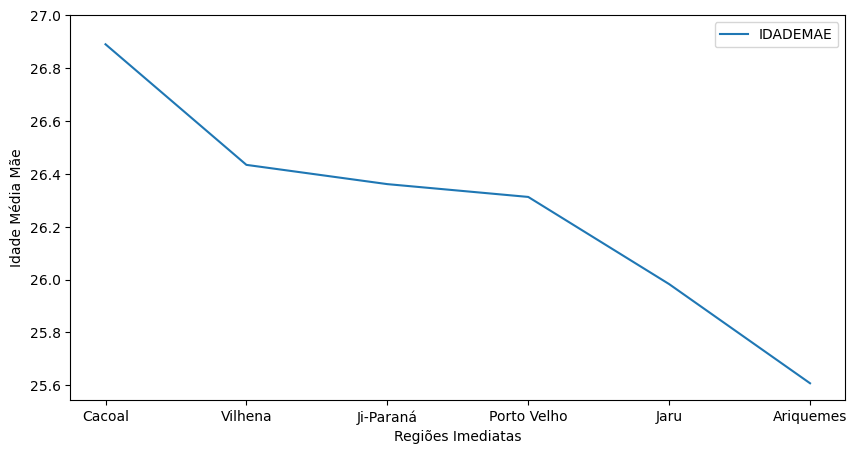

In [8]:
# Plotting with existing data, isolating the results by the list "listas_slct". 
sinasc_4 = sinasc_raw[['IDADEMAE', 'munResNome']].copy()
listas_slct = ['Porto Velho', 'Ji-Paraná', 'Ariquemes', 'Vilhena', 'Cacoal', 'Jaru']

reg_imed = sinasc_4['munResNome'].isin(listas_slct)
sinasc_4 = sinasc_4[reg_imed]

idade_med_mae = sinasc_4.groupby('munResNome').mean().sort_values(by='IDADEMAE', ascending=False)

ax = idade_med_mae.plot(figsize = [10,5])
ax.set_yticks(np.arange(25.6, 27.2, 0.2))
ax.set_xlabel('Regiões Imediatas')
ax.set_ylabel('Idade Média Mãe')
plt.show()

In [9]:
# Using mapping, to determine their correspondents.
sinasc_4_1 = sinasc_raw[['IDADEMAE', 'munResNome']].copy()
sinasc_4_1.munResNome.unique()

array(["Alta Floresta D'Oeste", 'Alto Alegre dos Parecis',
       'Novo Horizonte do Oeste', 'Rolim de Moura', "São Felipe D'Oeste",
       'Ariquemes', 'Cujubim', 'Alto Paraíso', 'Monte Negro', 'Jaru',
       'Rio Crespo', 'Porto Velho', 'Cacaulândia', 'Itapuã do Oeste',
       'Ji-Paraná', 'Buritis', 'Vilhena', 'Vale do Anari',
       'Candeias do Jamari', 'Costa Marques', 'Campo Novo de Rondônia',
       "Machadinho D'Oeste", 'Colorado do Oeste', 'Nova Mamoré', 'Urupá',
       'Ouro Preto do Oeste', 'Corumbiara', 'São Miguel do Guaporé',
       'Governador Jorge Teixeira', "Santa Luzia D'Oeste",
       'Pimenta Bueno', 'Mirante da Serra', 'Cerejeiras',
       'Presidente Médici', 'Cacoal', 'Parecis', "Espigão D'Oeste",
       'São Francisco do Guaporé', 'Ministro Andreazza',
       "Nova Brasilândia D'Oeste", "Alvorada D'Oeste",
       'Primavera de Rondônia', 'Seringueiras', 'Município ignorado - RO',
       'Castanheiras', 'Chupinguaia', 'Guajará-Mirim', 'Theobroma',
       'Nova 

In [10]:
# Setting the results by the dictionary "imediatas".
imediatas = {
    "Alta Floresta D'Oeste":"Cacoal",
    "Alto Alegre dos Parecis":"Cacoal",
    "Novo Horizonte do Oeste":"Cacoal",
    "Rolim de Moura":"Cacoal",
    "São Felipe D'Oeste":"Cacoal",
    "Ariquemes":"Ariquemes",
    "Cujubim":"Ariquemes",
    "Alto Paraíso":"Ariquemes",
    "Monte Negro":"Ariquemes",
    "Jaru":"Jaru",
    "Rio Crespo":"Ariquemes",
    "Porto Velho":"Porto Velho",
    "Cacaulândia":"Ariquemes",
    "Itapuã do Oeste":"Porto Velho",
    "Ji-Paraná":"Ji-Paraná",
    "Buritis":"Ariquemes",
    "Vilhena":"Vilhena",
    "Vale do Anari":"Jaru",
    "Candeias do Jamari":"Porto Velho",
    "Costa Marques":"Ji-Paraná",
    "Campo Novo de Rondônia":"Ariquemes",
    "Machadinho D'Oeste":"Jaru",
    "Colorado do Oeste":"Vilhena",
    "Nova Mamoré":"Porto Velho",
    "Urupá":"Ji-Paraná",
    "Ouro Preto do Oeste":"Ji-Paraná",
    "Corumbiara":"Vilhena",
    "São Miguel do Guaporé":"Ji-Paraná",
    "Governador Jorge Teixeira":"Jaru",
    "Santa Luzia D'Oeste":"Cacoal",
    "Pimenta Bueno":"Cacoal",
    "Mirante da Serra":"Ji-Paraná",
    "Cerejeiras":"Vilhena",
    "Presidente Médici":"Ji-Paraná",
    "Cacoal":"Cacoal",
    "Parecis":"Cacoal",
    "Espigão D'Oeste":"Cacoal",
    "São Francisco do Guaporé":"Ji-Paraná",
    "Ministro Andreazza":"Cacoal",
    "Nova Brasilândia D'Oeste":"Cacoal",
    "Alvorada D'Oeste":"Ji-Paraná",
    "Primavera de Rondônia":"Cacoal",
    "Seringueiras":"Ji-Paraná",
    "Município ignorado - RO":"Município ignorado - RO",
    "Castanheiras":"Cacoal",
    "Chupinguaia":"Vilhena",
    "Guajará-Mirim":"Porto Velho",
    "Theobroma":"Jaru",
    "Nova União":"Ji-Paraná",
    "Teixeirópolis":"Ji-Paraná",
    "Vale do Paraíso":"Ji-Paraná",
    "Pimenteiras do Oeste":"Vilhena",
    "Cabixi":"Vilhena"
}

sinasc_4_1 = sinasc_4_1.set_index('munResNome')
sinasc_4_1

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,19
Alta Floresta D'Oeste,29
Alta Floresta D'Oeste,37
Alto Alegre dos Parecis,30
Alta Floresta D'Oeste,30
...,...
Vilhena,32
Chupinguaia,19
Vilhena,24


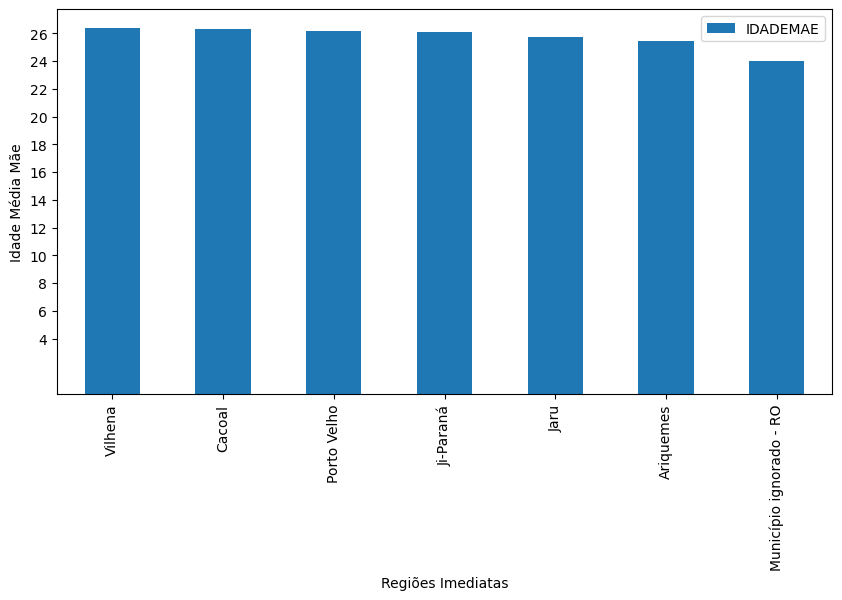

In [16]:
mapping_idade_media = sinasc_4_1.groupby(imediatas).mean().sort_values(by='IDADEMAE', ascending=False)

ax = mapping_idade_media.plot(figsize = [10,5], kind='bar')
ax.set_yticks(np.arange(4, 27, 2))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Regiões Imediatas')
ax.set_ylabel('Idade Média Mãe')
plt.show()

In [12]:
# A second way to resolve the issue would be to create a column according to their respective data.
sinasc_4_2 = sinasc_raw[['IDADEMAE', 'munResNome']].copy()

def substituir_municipios(municipio):
    if municipio in ["Candeias do Jamari", "Guajará-Mirim", "Itapuã do Oeste", "Nova Mamoré", "Porto Velho"]:
        return "Porto Velho"
    elif municipio in ["Alto Paraíso", "Ariquemes", "Buritis", 
                          "Cacaulândia","Campo Novo de Rondônia", 
                          "Cujubim", "Monte Negro", "Rio Crespo"]: 
        return "Ariquemes"
    elif municipio in ["Governador Jorge Teixeira", "Jaru", "Machadinho d'Oeste",
                          "Theobroma", "Vale do Anari"]: 
        return "Jaru"
    elif municipio in ["Alvorada d'Oeste","Costa Marques", "Ji-Paraná", "Mirante da Serra",
                          "Nova União", "Ouro Preto do Oeste", "Presidente Médici", "São Francisco do Guaporé",
                          "São Miguel do Guaporé", "Seringueiras", "Teixeirópolis", "Urupá", "Vale do Paraíso"]: 
        return "Ji-Paraná"    
    elif municipio in ["Alta Floresta d'Oeste", "Alto Alegre dos Parecis", "Cacoal", "Castanheiras",
                          "Espigão d'Oeste", "Ministro Andreazza", "Nova Brasilândia d'Oeste", "Novo Horizonte do Oeste",
                          "Parecis", "Pimenta Bueno", "Primavera de Rondônia", "Rolim de Moura", "Santa Luzia d'Oeste",
                          "São Felipe d'Oeste"]: 
        return "Cacoal"

    else: 
        return "Vilhena"


sinasc_4_2["new_imediata"] = sinasc_4_2['munResNome'].apply(substituir_municipios)
sinasc_4_2.groupby('new_imediata')['IDADEMAE'].mean()

new_imediata
Ariquemes      25.459635
Cacoal         26.434757
Jaru           25.805579
Ji-Paraná      26.108682
Porto Velho    26.166303
Vilhena        26.193298
Name: IDADEMAE, dtype: float64

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


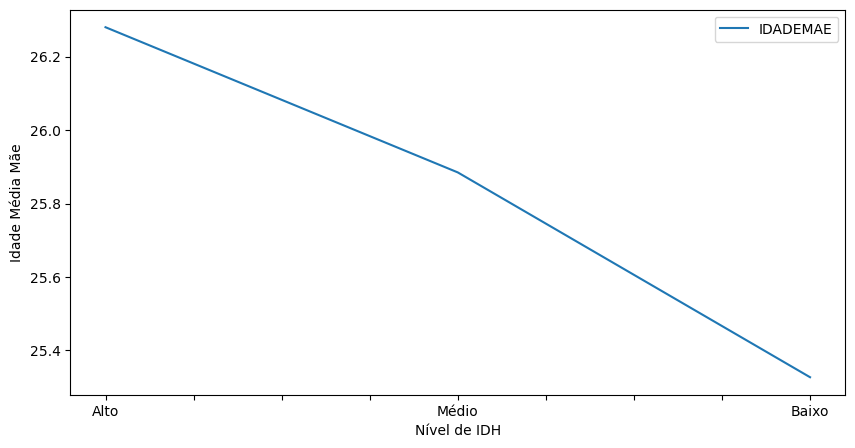

In [13]:
sinasc5_1 = sinasc_raw[['IDADEMAE', 'munResNome']].copy()
idh = {
    "Alta Floresta D'Oeste":"Médio",
    "Alto Alegre dos Parecis":"Baixo",
    "Novo Horizonte do Oeste":"Médio",
    "Rolim de Moura":"Alto",
    "São Felipe D'Oeste":"Médio",
    "Ariquemes":"Alto",
    "Cujubim":"Médio",
    "Alto Paraíso":"Médio",
    "Monte Negro":"Médio",
    "Jaru":"Médio",
    "Rio Crespo":"Médio",
    "Porto Velho":"Alto",
    "Cacaulândia":"Médio",
    "Itapuã do Oeste":"Médio",
    "Ji-Paraná":"Alto",
    "Buritis":"Médio",
    "Vilhena":"Alto",
    "Vale do Anari":"Baixo",
    "Candeias do Jamari":"Médio",
    "Costa Marques":"Médio",
    "Campo Novo de Rondônia":"Baixo",
    "Machadinho D'Oeste":"Baixo",
    "Colorado do Oeste":"Médio",
    "Nova Mamoré":"Baixo",
    "Urupá":"Médio",
    "Ouro Preto do Oeste":"Médio",
    "Corumbiara":"Médio",
    "São Miguel do Guaporé":"Médio",
    "Governador Jorge Teixeira":"Baixo",
    "Santa Luzia D'Oeste":"Médio",
    "Pimenta Bueno":"Alto",
    "Mirante da Serra":"Médio",
    "Cerejeiras":"Médio",
    "Presidente Médici":"Médio",
    "Cacoal":"Alto",
    "Parecis":"Médio",
    "Espigão D'Oeste":"Médio",
    "São Francisco do Guaporé":"Médio",
    "Ministro Andreazza":"Médio",
    "Nova Brasilândia D'Oeste":"Médio",
    "Alvorada D'Oeste":"Médio",
    "Primavera de Rondônia":"Médio",
    "Seringueiras":"Baixo",
    "Castanheiras":"Médio",
    "Chupinguaia":"Médio",
    "Guajará-Mirim":"Médio",
    "Theobroma":"Baixo",
    "Nova União":"Baixo",
    "Teixeirópolis":"Médio",
    "Vale do Paraíso":"Médio",
    "Pimenteiras do Oeste":"Médio",
    "Cabixi":"Médio"
}

sinasc5_1 = sinasc5_1.set_index('munResNome')


mapping_idade_media = sinasc5_1.groupby(idh).mean().sort_values(by='IDADEMAE', ascending=False)

ax = mapping_idade_media.plot(figsize = [10,5])
ax.set_xlabel('Nível de IDH')
ax.set_ylabel('Idade Média Mãe')
plt.show()

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


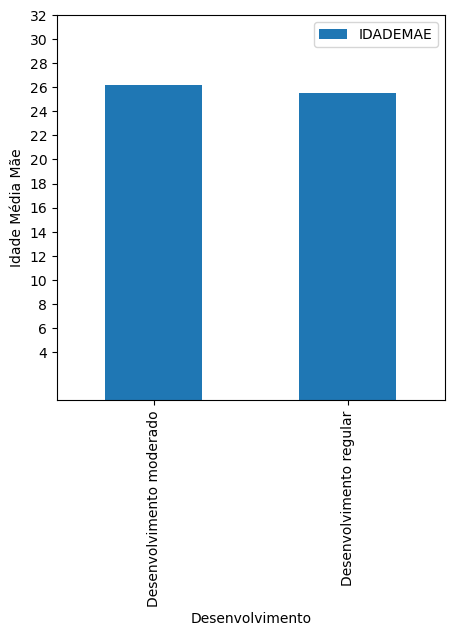

In [14]:
sinasc5_2 = sinasc_raw[['IDADEMAE', 'munResNome']].copy()
desenvolvimento = {
    "Alta Floresta D'Oeste":"Desenvolvimento moderado",
    "Alto Alegre dos Parecis":"Desenvolvimento regular",
    "Novo Horizonte do Oeste":"Desenvolvimento regular",
    "Rolim de Moura":"Desenvolvimento moderado",
    "São Felipe D'Oeste":"Desenvolvimento moderado",
    "Ariquemes":"Desenvolvimento moderado",
    "Cujubim":"Desenvolvimento regular",
    "Alto Paraíso":"Desenvolvimento regular",
    "Monte Negro":"Desenvolvimento moderado",
    "Jaru":"Desenvolvimento moderado",
    "Rio Crespo":"Desenvolvimento moderado",
    "Porto Velho":"Desenvolvimento moderado",
    "Cacaulândia":"Desenvolvimento regular",
    "Itapuã do Oeste":"Desenvolvimento regular",
    "Ji-Paraná":"Desenvolvimento moderado",
    "Buritis":"Desenvolvimento moderado",
    "Vilhena":"Desenvolvimento moderado",
    "Vale do Anari":"Desenvolvimento regular",
    "Candeias do Jamari":"Desenvolvimento moderado",
    "Costa Marques":"Desenvolvimento regular",
    "Campo Novo de Rondônia":"Desenvolvimento regular",
    "Machadinho D'Oeste":"Desenvolvimento regular",
    "Colorado do Oeste":"Desenvolvimento moderado",
    "Nova Mamoré":"Desenvolvimento regular",
    "Urupá":"Desenvolvimento moderado",
    "Ouro Preto do Oeste":"Desenvolvimento moderado",
    "Corumbiara":"Desenvolvimento regular",
    "São Miguel do Guaporé":"Desenvolvimento moderado",
    "Governador Jorge Teixeira":"Desenvolvimento regular",
    "Santa Luzia D'Oeste":"Desenvolvimento moderado",
    "Pimenta Bueno":"Desenvolvimento moderado",
    "Mirante da Serra":"Desenvolvimento regular",
    "Cerejeiras":"Desenvolvimento moderado",
    "Presidente Médici":"Desenvolvimento moderado",
    "Cacoal":"Desenvolvimento moderado",
    "Parecis":"Desenvolvimento regular",
    "Espigão D'Oeste":"Desenvolvimento regular",
    "São Francisco do Guaporé":"Desenvolvimento moderado",
    "Ministro Andreazza":"Desenvolvimento regular",
    "Nova Brasilândia D'Oeste":"Desenvolvimento regular",
    "Alvorada D'Oeste":"Desenvolvimento regular",
    "Primavera de Rondônia":"Desenvolvimento moderado",
    "Seringueiras":"Desenvolvimento regular",
    "Castanheiras":"Desenvolvimento regular",
    "Chupinguaia":"Desenvolvimento moderado",
    "Guajará-Mirim":"Desenvolvimento regular",
    "Theobroma":"Desenvolvimento regular",
    "Nova União":"Desenvolvimento regular",
    "Teixeirópolis":"Desenvolvimento moderado",
    "Vale do Paraíso":"Desenvolvimento regular",
    "Pimenteiras do Oeste":"Desenvolvimento moderado",
    "Cabixi":"Desenvolvimento regular"
}

sinasc5_2 = sinasc5_2.set_index('munResNome')


mapping_desenvolvimento_medio = sinasc5_1.groupby(desenvolvimento).mean().sort_values(by='IDADEMAE', ascending=False)

ax = mapping_desenvolvimento_medio.plot(figsize = [5,5], kind='bar')

ax.set_yticks(np.arange(4, 33, 2))
ax.set_xlabel('Desenvolvimento')
ax.set_ylabel('Idade Média Mãe')
plt.show()


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


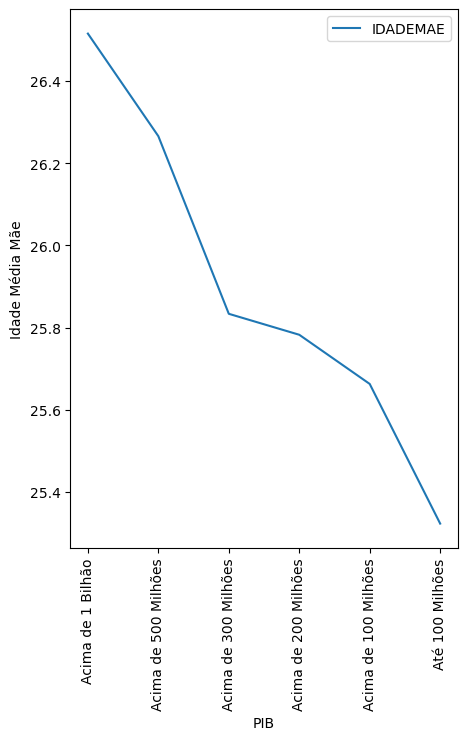

In [15]:
sinasc5_3 = sinasc_raw[['IDADEMAE', 'munResNome']].copy()
pib = {
    "Alta Floresta D'Oeste":"Acima de 300 Milhões",
    "Alto Alegre dos Parecis":"Acima de 200 Milhões",
    "Novo Horizonte do Oeste":"Acima de 100 Milhões",
    "Rolim de Moura":"Acima de 1 Bilhão",
    "São Felipe D'Oeste":"Até 100 Milhões",
    "Ariquemes":"Acima de 1 Bilhão",
    "Cujubim":"Acima de 300 Milhões",
    "Alto Paraíso":"Acima de 300 Milhões",
    "Monte Negro":"Acima de 200 Milhões",
    "Jaru":"Acima de 1 Bilhão",
    "Rio Crespo":"Até 100 Milhões",
    "Porto Velho":"Acima de 1 Bilhão",
    "Cacaulândia":"Acima de 100 Milhões",
    "Itapuã do Oeste":"Acima de 100 Milhões",
    "Ji-Paraná":"Acima de 1 Bilhão",
    "Buritis":"Acima de 500 Milhões",
    "Vilhena":"Acima de 1 Bilhão",
    "Vale do Anari":"Acima de 100 Milhões",
    "Candeias do Jamari":"Acima de 500 Milhões",
    "Costa Marques":"Acima de 100 Milhões",
    "Campo Novo de Rondônia":"Acima de 200 Milhões",
    "Machadinho D'Oeste":"Acima de 500 Milhões",
    "Colorado do Oeste":"Acima de 300 Milhões",
    "Nova Mamoré":"Acima de 500 Milhões",
    "Urupá":"Acima de 100 Milhões",
    "Ouro Preto do Oeste":"Acima de 500 Milhões",
    "Corumbiara":"Acima de 100 Milhões",
    "São Miguel do Guaporé":"Acima de 500 Milhões",
    "Governador Jorge Teixeira":"Acima de 100 Milhões",
    "Santa Luzia D'Oeste":"Acima de 100 Milhões",
    "Pimenta Bueno":"Acima de 1 Bilhão",
    "Mirante da Serra":"Acima de 100 Milhões",
    "Cerejeiras":"Acima de 500 Milhões",
    "Presidente Médici":"Acima de 300 Milhões",
    "Cacoal":"Acima de 1 Bilhão",
    "Parecis":"Até 100 Milhões",
    "Espigão D'Oeste":"Acima de 500 Milhões",
    "São Francisco do Guaporé":"Acima de 300 Milhões",
    "Ministro Andreazza":"Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste":"Acima de 300 Milhões",
    "Alvorada D'Oeste":"Acima de 200 Milhões",
    "Primavera de Rondônia":"Até 100 Milhões",
    "Seringueiras":"Acima de 100 Milhões",
    "Castanheiras":"Até 100 Milhões",
    "Chupinguaia":"Acima de 100 Milhões",
    "Guajará-Mirim":"Acima de 500 Milhões",
    "Theobroma":"Acima de 100 Milhões",
    "Nova União":"Até 100 Milhões",
    "Teixeirópolis":"Até 100 Milhões",
    "Vale do Paraíso":"Acima de 100 Milhões",
    "Pimenteiras do Oeste":"Até 100 Milhões",
    "Cabixi":"Acima de 100 Milhões"
}

sinasc5_3 = sinasc5_3.set_index('munResNome')


mapping_pib_medio = sinasc5_3.groupby(pib).mean().sort_values(by='IDADEMAE', ascending=False)

ordem_rotulos = ['Acima de 1 Bilhão', 'Acima de 500 Milhões', 'Acima de 300 Milhões', 
                 'Acima de 200 Milhões', 'Acima de 100 Milhões', 'Até 100 Milhões']

ax = mapping_pib_medio.plot(figsize = [5,7])

posicoes = np.arange(len(ordem_rotulos))
ax.set_xticks(posicoes)
ax.set_xticklabels(ordem_rotulos, rotation=90)

ax.set_xlabel('PIB')
ax.set_ylabel('Idade Média Mãe')
plt.show()




### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- Vilhena, Cacoal, Porto Velho possuem as maiores idades médias das mães.
- O Município ignorado - RO é o que possuí menor idade média para as mães.
- Quanto maior o IDH, maior a idade média das mães, por volta de 26,3. O IDH mais baixo tem a idade média das mães de 25,3 anos.
- Em relação ao Índice FIRJAN de Desenvolvimento Municipal, assim como IDH, quanto maior o desenvolvimento maior a idade média das mães.
- Conseguimos verificar também que em valores maiores de PIB teremos mães mais maduras. PIB acima de 1 Bilhão temos a idade média das mães de 26,5 anos. Já em PIB até 100 Milhões temos idade média de 25,3 anos entre as mães.
- É possível concluir que conforme as informações de qualidade de vida definidas, conseguimos verificar que em lugares mais desenvolvidos a conscientização e métodos contraceptivos interferem na idade das mães. Quanto menor valor de IDH, PIB e IFDM, os riscos de ser uma mãe mais jovem é maior.